# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Vanesya Meisyarah
- **Email:** vanesya.rah@gmail.com
- **ID Dicoding:** m891d5x1930

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh kondisi cuaca terhadap jumlah peminjaman sepeda?
- Bagaimana pola peminjaman sepeda berdasarkan musim (season)?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [18]:
df = df = pd.read_csv("data/day.csv")
df.head()
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:**
- Dataset Bike Sharing terdiri dari 731 baris dan 16 kolom yang merepresentasikan data peminjaman sepeda harian.
- Dataset memiliki variabel target cnt yang menunjukkan total peminjaman sepeda, serta beberapa variabel pendukung seperti musim, cuaca, dan hari kerja.

### Assessing Data

In [19]:
df.isnull().sum()
df.duplicated().sum()

0

**Insight:**
- Tidak ditemukan missing value pada dataset, sehingga data dapat langsung digunakan untuk analisis lanjutan.
- Dataset tidak memiliki data duplikat, menandakan data sudah cukup bersih secara struktur.

### Cleaning Data

In [20]:
df_clean = df.copy()
df_clean.rename(columns={'cnt': 'total_rentals'}, inplace=True)
df_clean.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'total_rentals'],
      dtype='object')

**Insight:**
- Kolom cnt diubah menjadi total_rentals untuk meningkatkan keterbacaan dan pemahaman analisis.
- Proses cleaning tidak memerlukan penghapusan data karena kualitas data sudah baik.

## Exploratory Data Analysis (EDA)

### Explore df_clean

In [21]:
df_clean.describe()
df_clean.groupby('season')['total_rentals'].mean()
df_clean.groupby('weathersit')['total_rentals'].mean()
df_clean.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,total_rentals
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Rata-rata peminjaman sepeda berbeda pada setiap musim, menunjukkan adanya pengaruh musim terhadap jumlah peminjaman.
- Kondisi cuaca cerah (weathersit = 1) memiliki rata-rata peminjaman tertinggi dibandingkan kondisi cuaca lainnya.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

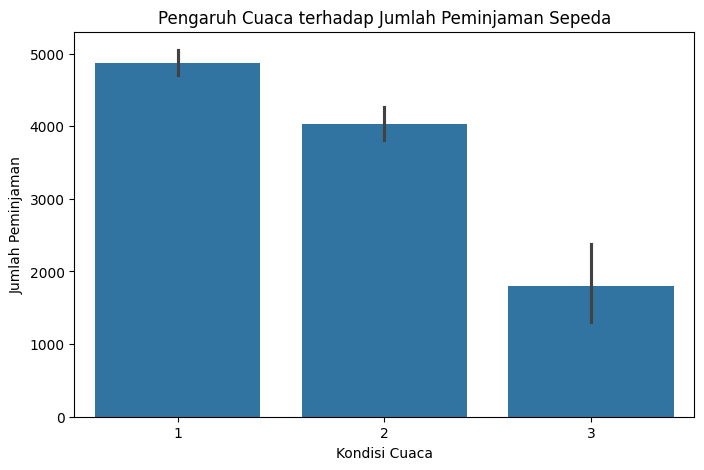

In [22]:
plt.figure(figsize=(8,5))
sns.barplot(x='weathersit', y='total_rentals', data=df_clean)
plt.title("Pengaruh Cuaca terhadap Jumlah Peminjaman Sepeda")
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Jumlah Peminjaman")
plt.show()

### Pertanyaan 2:

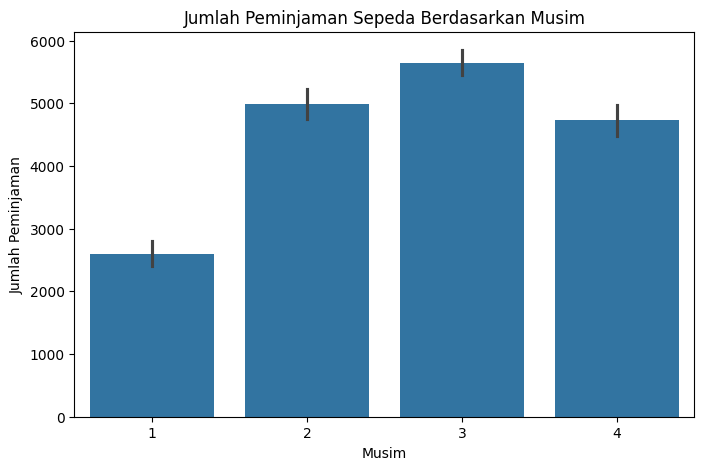

In [23]:
plt.figure(figsize=(8,5))
sns.barplot(x='season', y='total_rentals', data=df_clean)
plt.title("Jumlah Peminjaman Sepeda Berdasarkan Musim")
plt.xlabel("Musim")
plt.ylabel("Jumlah Peminjaman")
plt.show()

**Insight:**
- Semakin buruk kondisi cuaca, semakin menurun jumlah peminjaman sepeda.
- Musim gugur memiliki tingkat peminjaman sepeda tertinggi.

## Analisis Lanjutan (Opsional)

## Conclusion

- Kondisi cuaca memiliki pengaruh signifikan terhadap jumlah peminjaman sepeda. Cuaca cerah mendorong peningkatan peminjaman, sedangkan cuaca buruk menurunkan minat pengguna.
- Musim memengaruhi pola peminjaman sepeda, di mana musim gugur menjadi periode dengan peminjaman tertinggi dan musim dingin terendah.